In [ ]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
set_matplotlib_formats("svg")
plt.style.use('ggplot')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Lecture 14 – Models and Viewpoints

## DSC 10, Winter 2023

### Announcements

- Midterm Exam scores are available. See [this post](https://edstem.org/us/courses/33310/discussion/2574389) for details.
    - Only worth 10%. Take it as a learning experience!
- The Midterm Project is due **tomorrow at 11:59PM**.
    - Slip days can be used if needed. Will detract from both partner's allocation.
    - Only **one** partner should submit and "Add Group Member" on Gradescope.
- Lab 5 is due **Saturday 2/18 at 11:59PM**.

### Agenda

- Statistical models.
- Example: Jury selection.
- Example: Genetics of peas. 🟢
- Viewpoints and test statistics.
- Example: Is our coin fair?

## Statistical models

### Models

- A model is a set of assumptions about how data was generated.

<center><img src='data/box.jpg' width=500></center>

- We want a way to assess the quality of a given model.

### Example

<center><img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/Pisa_experiment.png" width=500></center>

[Galileo's Leaning Tower of Pisa Experiment](https://en.wikipedia.org/wiki/Galileo%27s_Leaning_Tower_of_Pisa_experiment)

## Example: Jury selection

### Swain vs. Alabama, 1965
- Robert Swain was a Black man convicted of crime in Talladega County, Alabama.

- He appealed the jury's decision all the way to the Supreme Court, on the grounds that Talladega County systematically excluded Black people from juries.

- At the time, only men 21 years or older were allowed to serve on juries. 26% of this eligible population was Black.

- But of the 100 men on Robert Swain's jury panel, only 8 were Black.

<center>$\substack{\text{eligible} \\ \text{population}}
\xrightarrow{\substack{\text{representative} \\ \text{sample}}} 
\substack{\text{jury} \\ \text{panel}}
\xrightarrow{\substack{\text{selection by} \\ \text{judge/attorneys}}} 
\substack{\text{actual} \\ \text{jury}}$</center>

### Supreme Court ruling

- About disparities between the percentages in the eligible population and the jury panel, the Supreme Court wrote:

> "... the overall percentage disparity has been small...”

- The Supreme Court denied Robert Swain’s appeal and he was sentenced to life in prison.

- We now have the tools to show **quantitatively** that the Supreme Court's claim was misguided.

- This "overall percentage disparity" turns out to be not so small, and is an example of racial bias.
    - Jury panels were often made up of people in the jury commissioner's professional and social circles.
    - Of the 8 Black men on the jury panel, **none** were selected to be part of the actual jury.

### Our model for simulating Swain's jury panel

- We will **assume** the jury panel consists of 100 men, **randomly** chosen from a population that is 26% Black.

- **Our question: is this model (i.e. assumption) right or wrong?**

### Our approach: simulation

- We'll start by assuming that this model is true.

- We'll generate many jury panels using this assumption.

- We'll count the number of Black men in each simulated jury panel to see how likely it is for a random panel to contain 8 or fewer Black men.

### Simulating statistics

Recall, a *statistic* is a number calculated from a sample.

1. Run an experiment once to generate one value of a statistic.
    - In this case, sample 100 people randomly from a population that is 26% Black, and count **the number of Black men (statistic)**.

2. Run the experiment many times, generating many values of the statistic, and store these statistics in an array.

3. Visualize the resulting **empirical distribution of the statistic**.

### Step 1 – Running the experiment once

- How do we randomly sample a jury panel? 
    - `np.random.choice` won't help us, because we don't know how large the eligible population is.

- The function `np.random.multinomial` helps us sample at random from a **categorical distribution**.

```py
np.random.multinomial(sample_size, pop_distribution)
```

- `np.random.multinomial` samples at random from the population, **with replacement**, and returns a random array containing counts in each category.
    - `pop_distribution` needs to be an array containing the probabilities of each category.

**Aside: Example usage of `np.random.multinomial`**

On Halloween 👻 you'll trick-or-treat at 35 houses, each of which has an identical candy box, containing:
- 30% Starbursts.
- 30% Sour Patch Kids.
- 40% Twix.

At each house, you'll select one candy blindly from the candy box.

To simulate the act of going to 35 houses, we can use `np.random.multinomial`:

In [ ]:
np.random.multinomial(35, [0.3, 0.3, 0.4])

### Step 1 – Running the experiment once

In our case, a randomly selected member of our population is Black with probability 0.26 and not Black with probability 1 - 0.26 = 0.74.

In [ ]:
demographics = [0.26, 0.74]

Each time we run the following cell, we'll get a new random sample of 100 people from this population.
- The first element of the resulting array is the number of Black men in the sample.
- The second element is the number of non-Black men in the sample.

In [ ]:
np.random.multinomial(100, demographics)

### Step 1 – Running the experiment once

We also need to calculate the statistic, which in this case is the number of Black men in the random sample of 100.

In [ ]:
np.random.multinomial(100, demographics)[0]

### Step 2 – Repeat the experiment many times

* Let's run 10,000 simulations.
* We'll keep track of the number of Black men in each simulated jury panel in the array `counts`.

In [ ]:
counts = np.array([])

for i in np.arange(10000):
    new_count = np.random.multinomial(100, demographics)[0]
    counts = np.append(counts, new_count)

In [ ]:
counts

### Step 3 – Visualize the resulting distribution

Was a jury panel with 8 Black men suspiciously unusual?

In [ ]:
(bpd.DataFrame().assign(count_black_men=counts)
                .plot(kind='hist', bins = np.arange(9.5, 45, 1), 
                      density=True, ec='w', figsize=(10, 5),
                      title='Empiricial Distribution of the Number of Black Men in Simulated Jury Panels of Size 100'));
observed_count = 8
plt.axvline(observed_count, color='black', linewidth=4, label='Observed Number of Black Men in Actual Jury Panel')
plt.legend();

In [ ]:
# In 10,000 random experiments, the panel with the fewest Black men had how many?
counts.min()

### Conclusion

- Our simulation shows that there's essentially no chance that a random sample of 100 men drawn from a population in which 26% of men are Black will contain 8 or fewer Black men.
- As a result, it seems that the model we proposed – that the jury panel was drawn at random from the eligible population – is flawed.
- There were likely factors **other than chance** that explain why there were only 8 Black men on the jury panel.

## Example: Genetics of peas 🟢

### Gregor Mendel, 1822-1884

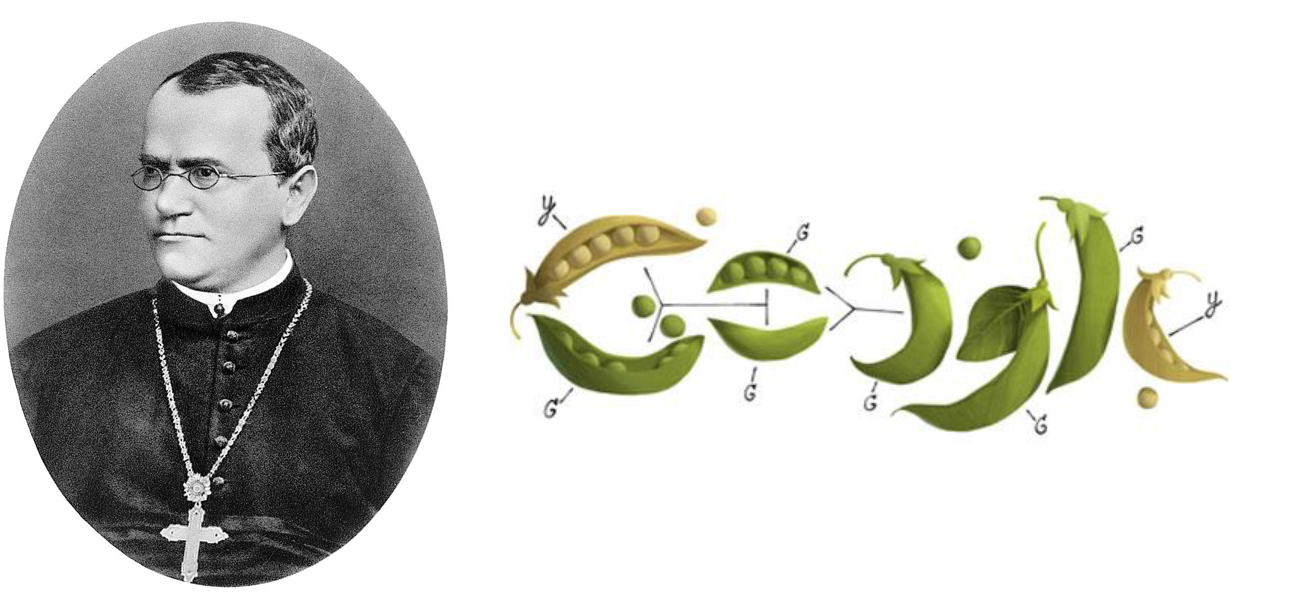

- Mendel is known as the father of genetics.
- Many of his experiments involved pea plants. 

### Mendel's model

- One type of pea plant that Mendel studied had flowers that were either purple or white.

- Mendel grew 929 of these pea plants, and 705 of them had purple flowers.

- Mendel’s **model**: each plant has a 75% chance of growing purple flowers and a 25% chance of growing white flowers, independent of the colors of the other plants.

- **Question:** Is this model good or not?

### Choosing a statistic

- Plan: Repeatedly draw samples of 929 pea plants from a population that is 75% purple and 25% white.

- Each time, compute the proportion of plants in the sample with purple flowers. If that proportion is **much larger or much smaller** than 0.75, that is evidence against the model!

- One of the many possible statistics that encapsulates this logic:

$$| \text{sample proportion of plants with purple flowers} - 0.75 |$$

In [ ]:
model = [0.75, 0.25]

In [ ]:
# Draw 929 plants and calculate the proportion of plants with purple flowers
np.random.multinomial(929,  model)[0] / 929

### Simulating Mendel's experiment
- Mendel grew 929 pea plants.
- We will simulate the act of growing 929 pea plants many times and look at the resulting values of the statistic we chose.

In [ ]:
distances = np.array([])

for i in np.arange(10000):
    new_distance = abs(np.random.multinomial(929,  model)[0] / 929 - 0.75)
    distances = np.append(distances, new_distance)

In [ ]:
bpd.DataFrame().assign(simulated_abs_differences=distances) \
               .plot(kind='hist', bins=np.arange(0, 0.055, 0.0025),
                     density=True, ec='w', figsize=(10, 5),
                     title='Empirical Distribution of the Statistic | proportion purple - 0.75 |');

Without context, these numbers aren't helpful – we need to see where the value of the statistic in Mendel's original observation lies in this distribution!

### Mendel's experiment
- Of the 929 pea plants that Mendel grew, 705 had purple flowers.
- Where does the **observed statistic** lie on the empirical distribution we just computed?

In [ ]:
observed_distance = abs(705 / 929 - 0.75)
observed_distance

In [ ]:
bpd.DataFrame().assign(simulated_absolute_differences=distances) \
               .plot(kind='hist', bins=np.arange(0, 0.055, 0.0025),
                     density=True, ec='w', figsize=(10, 5),
                     title='Empirical Distribution of the Statistic | proportion purple - 0.75 |');
plt.axvline(observed_distance, color='black', linewidth=4, label='Observed Value of the Statistic | proportion purple - 0.75 |')
plt.legend();

### Was Mendel's model any good?

- The empirical distribution we just drew shows the distribution of our statistic, $$| \text{sample proportion of plants with purple flowers} - 0.75 |$$ for many different samples created according to Mendel's model.

- The statistic calculated for his observation, where 705 of 929 plants had purple flowers, seems like a pretty typical value according to the model.

- Thus, it seems that according to the data we have, the model is reasonable.

### Mendelian inheritance

<center><img src='./data/mendel.png' width="400" height="400" /></center>

## Viewpoints and test statistics

### Choosing one of two viewpoints

Goal: choose between two views of the world, based on data in a sample.

- "This jury panel was selected at random." OR "This jury panel was not selected at random, since there aren't enough Black men on it."

- "The probability of a pea plant having purple flowers is 75%." OR "The probability of a pea plant having purple flowers is not 75%."

### Test statistics

- For each sample, we calculate a single number – that is, a statistic.
    - Jury panel: # of Black men.
    - Pea plants: $ | \text{proportion purple} - 0.75 | $.

- This single number is called the **test statistic** since we use it when "testing" which viewpoint the data better supports.

- Think of the test statistic as the number you record each time you perform an experiment.

### Choosing one of two viewpoints

Is the observed value of the test statistic consistent with the empirical distribution of the test statistic (i.e., the simulated test statistics)?

- If so, we _think_ the viewpoint we used for the simulation is correct, so we **fail to reject** the viewpoint that we used for simulation.

- If not, we _think_ the other viewpoint is correct, and we **reject** the viewpoint that we used for simulation.

## Example: Is our coin fair?

### Example: Is our coin fair?

- Let's suppose we find a coin on the ground and we aren't sure whether it's fair.
- We flip the coin 400 times. Our results are recorded in the `flips_400` array below.

In [ ]:
flips_400 = bpd.read_csv('data/flips.csv').get('flips').values
flips_400

In [ ]:
heads = np.count_nonzero(flips_400 == 'Heads')
heads

In [ ]:
tails = len(flips_400) - heads
tails

Let's put these values in an array, since our simulations will also result in arrays.

In [ ]:
flips = np.array([heads, tails])
flips

### Designing a test statistic for a pair of viewpoints

Let's consider the pair of viewpoints “This coin is fair.” OR “No, it’s not.”

- If we observe a large number of heads or a small number of heads, this suggests that the coin is "not fair".

- As such, our test statistic should capture how far our number of heads is from that of a fair coin.

- One idea: $| \text{number of heads} - 200 |$.
    - If this number is large, that's evidence that the coin is not fair.
    - If this number is small, that's evidence that the coin is fair.

In [ ]:
def dist_from_200(arr):
    heads = arr[0]
    return abs(heads - 200)

In [ ]:
dist_from_200(flips)

### Simulating a fair coin

- Define the model for a fair coin (done).

- Define the test statistic (done).

- Run the simulation: Flip the coin 400 times, calculate the test statistic, and add it to a `results` array. Repeat this process many, many times.

- Plot a histogram of the `results`.

In [ ]:
model = [0.5, 0.5]

repetitions = 10000
results = np.array([])
for i in np.arange(repetitions):
    coins = np.random.multinomial(400, model)
    result = dist_from_200(coins)
    results = np.append(results, result)

results

In [ ]:
bpd.DataFrame().assign(results=results).plot(kind='hist', bins=np.arange(0, 40, 2), 
                                             density=True, ec='w', figsize=(10, 5),
                                             title='Empirical Distribution of the Statistic | Number of Heads - 200 |');
plt.axvline(dist_from_200(flips), color='black', linewidth=4, label='Observed Value of the Statistic | Number of Heads - 200 |')
plt.legend();

- The distance between the number of heads in our observed sample (188) and 200 is 12, which is a typical value under the assumption that the coin is fair.
- We don't have evidence to deny the viewpoint "The coin is fair," so that's what we side with.

### Concept Check ✅ – Answer at [cc.dsc10.com](http://cc.dsc10.com) 

Let's now consider the pair of viewpoints “This coin is fair.” OR “No, it's **biased towards heads**.” Which test statistic would be appropriate?

- A) $| \text{number of heads} - 200 |$.
- B) $\text{number of heads}$.
- C) Both are appropriate.
- D) Neither is appropriate.

### Another pair of viewpoints

- If our two viewpoints are “This coin is fair.” OR “No, it's **biased towards heads**," the test statistic $| \text{number of heads} - 200 |$ **won't work**. Why not?

- In our current example, the value of the statistic $| \text{number of heads} - 200 |$ is 12. However, given just this information, we can't tell whether we saw:
    - 212 heads, which would be evidence that the coin is biased towards heads.
    - 188 heads, which would not be evidence that the coin is biased towards heads.

- As such, for this pair of viewpoints, we need another test statistic.

- Idea: $\text{number of heads}$.
    - If this number is large, that's evidence that the coin is biased towards heads.
    - If this number is small, that's evidence that the coin is fair.

In [ ]:
def num_heads(arr):
    return arr[0]

### Simulating a fair coin, again

All that will change from our previous simulation is the function we use to compute our test statistic.

In [ ]:
model = [0.5, 0.5]

repetitions = 10000
results = np.array([])
for i in np.arange(repetitions):
    coins = np.random.multinomial(400, model)
    result = num_heads(coins)
    results = np.append(results, result)

results

In [ ]:
bpd.DataFrame().assign(results=results).plot(kind='hist', bins=np.arange(160, 240, 4), 
                                             density=True, ec='w', figsize=(10, 5),
                                             title='Empirical Distribution of the Number of Heads');
plt.axvline(num_heads(flips), color='black', linewidth=4, label='Observed Value of the Number of Heads')
plt.legend();

- The number of heads in our observed sample is 188.
- Under the assumption that the coin is fair, we often saw 188 or more heads.
- As such, the coin is probably not biased in favor of heads, and we side with the viewpoint "The coin is fair."

### Questions to consider before choosing a test statistic

- **Key idea:** Our choice of test statistic depends on the pair of viewpoints we want to decide between.

- Our test statistic should be such that either:
    - High values lean towards one viewpoint and low values lean towards the other.
    - Low values lean towards one viewpoint and high values lean towards other.

- We will avoid test statistics where both high and low values lean towards one viewpoint and values in the middle lean towards the other.
    - In other words, we will avoid "two-sided" tests.    

- In our recent exploration, viewpoint 1 was "The coin is fair."
    - When viewpoint 2 was "No, it's not," the test statistic we chose was $|\text{number of heads} - 200 |$.
    - When viewpoint 2 was "No, it's biased towards heads", the test statistic we chose was $\text{number of heads}$.

## Summary, next time

### Summary

- A model is an assumption about how data was generated. We're interested in determining the validity of models.
- When assessing a model, we consider two viewpoints of the world: one where the model is true, and another where the model is false for some reason.
- To assess a model, we:
    1. Conduct an experiment to form an **observation**.
    2. Simulate that experiment many times under the assumption that the model is true.
    3. Compute a **test statistic** on each of the simulated samples, as well as on the observed sample.
    4. Look at the resulting empirical distribution of test statistics and see where the observed test statistic falls. If it seems like an atypical value (too large or too small), that can be reason to believe the model is wrong.

### Next time

- All throughout today's lecture, we've been performing what are known as **hypothesis tests**.
- Next time, we'll formalize some of the language needed when working with hypothesis testing and make precise the process of deciding between two viewpoints.